# Final Project Part 1
### Group Member: Hongyu Yan, Chien Nguyen

### 1. What is the "name" of the dataset?
    Netflix movies and tv shows

### 2. Where did you obtain it?
    We found this dataset on Kaggle.com. Kaggle is known a big sharable dataset/database for all purpose and non-profit

### 3. Where can we obtain it
    https://urldefense.com/v3/__https://www.kaggle.com/datasets/shivamb/netflix-shows/versions/3?resource=download__;!!DZ3fjg!_t4S2aMQT_KMFBtPhazE895CdQPCR6hYUPIaslddns63UysfqapZtQQGqbrgP74mD-7Ri5plx4rjxivwGE_fGuhsM0c$   

### 4. What is the license of the dataset? What are we allowed to do with it?
    For my best guess, it should be Creative Commons Public Domain Dedication. It allows us to use the information from this database for non-profit purpose

### 5. How big is it in file size and in items?
    2.4MB (Not exceed Github limit)

### 6. Make a simple plot showing a relationship of interest

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv('netflix_titles.csv')

In [3]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...
1,80117401,Movie,Jandino: Whatever it Takes,NaN,Jandino Asporaat,United Kingdom,"September 9, 2016",2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...
2,70234439,TV Show,Transformers Prime,NaN,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,"September 8, 2018",2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob..."
3,80058654,TV Show,Transformers: Robots in Disguise,NaN,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,"September 8, 2018",2016,TV-Y7,1 Season,Kids' TV,When a prison ship crash unleashes hundreds of...
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,"September 8, 2017",2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...


In [4]:
#taking movie from 1990 to the lastest year
new_df = df[df['release_year'] >= 1990]

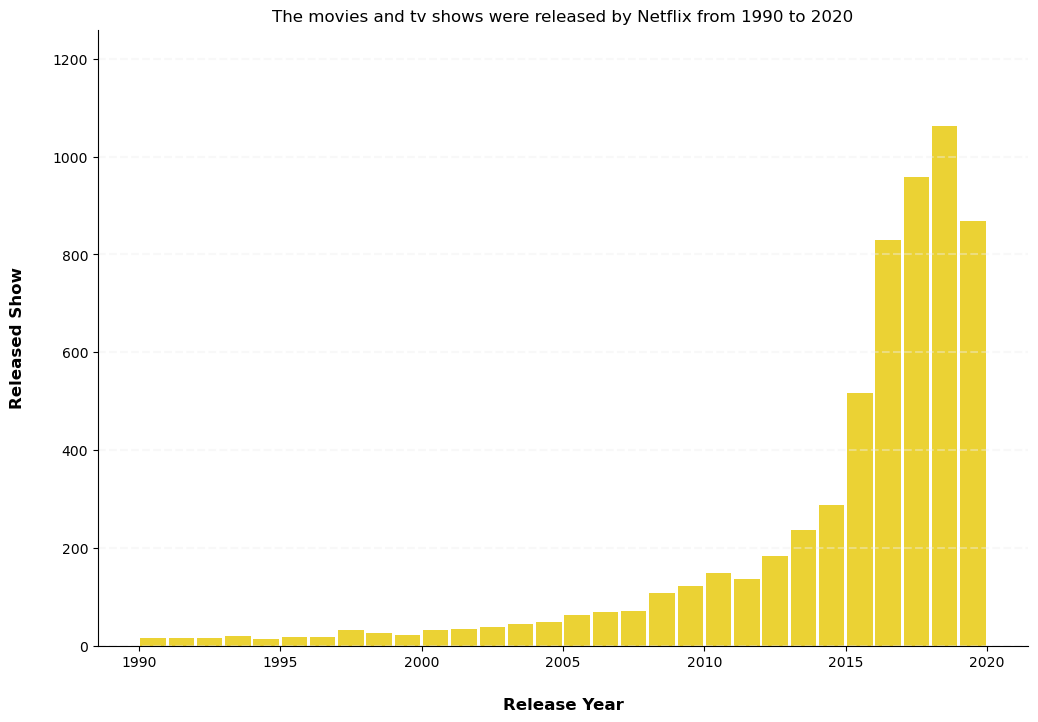

In [5]:
ax = new_df.hist(column='release_year', bins=30, grid=False, figsize=(12,8), color='#ebd234', rwidth=0.9)
ax = ax[0]
for x in ax:
    x.set_title("The movies and tv shows were released by Netflix from 1990 to 2020")
    vals = x.get_yticks()
    x.spines['right'].set_visible(False)
    x.spines['top'].set_visible(False)
    x.spines['left'].set_visible(True)
    for tick in vals:
        x.axhline(y=tick, linestyle='dashed', alpha=0.4, color='#eeeeee', zorder=1)
    x.set_xlabel("Release Year", labelpad=20, weight='bold', size=12)
    x.set_ylabel("Released Show", labelpad=20, weight='bold', size=12)

### For the first graph, we are trying to show how many movies and tv shows are released from 1990 to 2020. The earliest movie released on the dataset is 1925. However, there are small amount of movie released at that time. In that case, we set the year from 1990 to 2020.

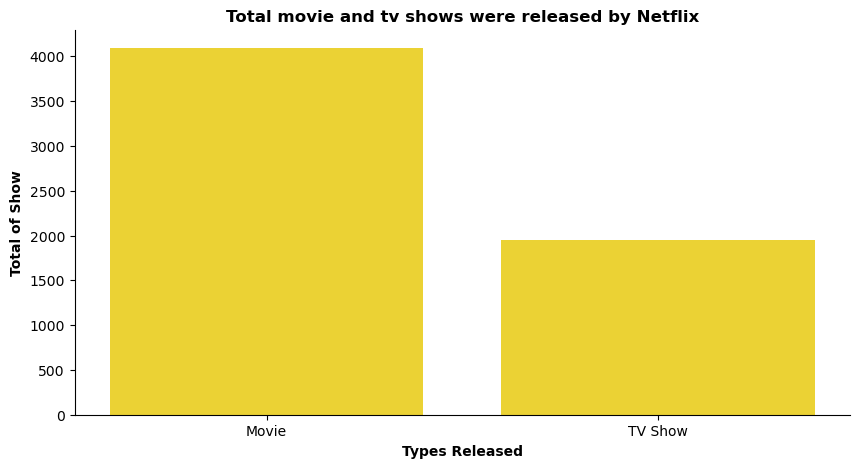

In [6]:
movies_tvs = new_df.groupby('type')['release_year'].count()
fig = plt.figure(figsize = (10, 5))
# creating the bar plot
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.bar(movies_tvs.keys(), movies_tvs, color ='#ebd234')
plt.xlabel("Types Released",weight='bold')
plt.ylabel("Total of Show",weight='bold')
plt.title("Total movie and tv shows were released by Netflix",weight='bold')
plt.show()

### For this graph, we are comparing the movies and tv shows released between 1920 to 2020. We can see that the number of movies established are twice of the tv shows. 

In [7]:
some_country_shows = new_df[(new_df['country'] == "United States") | (new_df['country'] == "Canada") | (new_df['country'] == "China") | (new_df['country'] == "Mexico") 
                            | (new_df['country'] == "India") | (new_df['country'] == "United Kingdom") | (new_df['country'] == "Japan")]

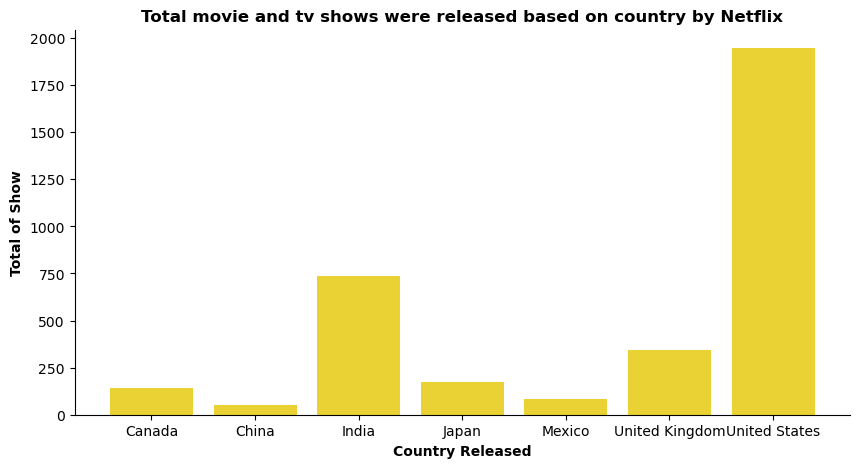

In [8]:
movies_tvs = some_country_shows.groupby('country')['release_year'].count()
fig = plt.figure(figsize = (10, 5))
# creating the bar plot
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.bar(movies_tvs.keys(), movies_tvs, color ='#ebd234')
plt.xlabel("Country Released",weight='bold')
plt.ylabel("Total of Show",weight='bold')
plt.title("Total movie and tv shows were released based on country by Netflix",weight='bold')
plt.show()

### For this graph, we are comparing between movies that created by different countries in Netflix. It's obvious that most of movies are come from the US. By the way, we dropped some movies which made by multiple coutries for making the graph more clearly.

In [9]:
movie_show = new_df[new_df['type'] == "Movie"]
tv_show = new_df[new_df['type'] == "TV Show"]

In [10]:
movie_group_year = movie_show.groupby('release_year')['type'].count()
tv_group_year = tv_show.groupby('release_year')['type'].count()

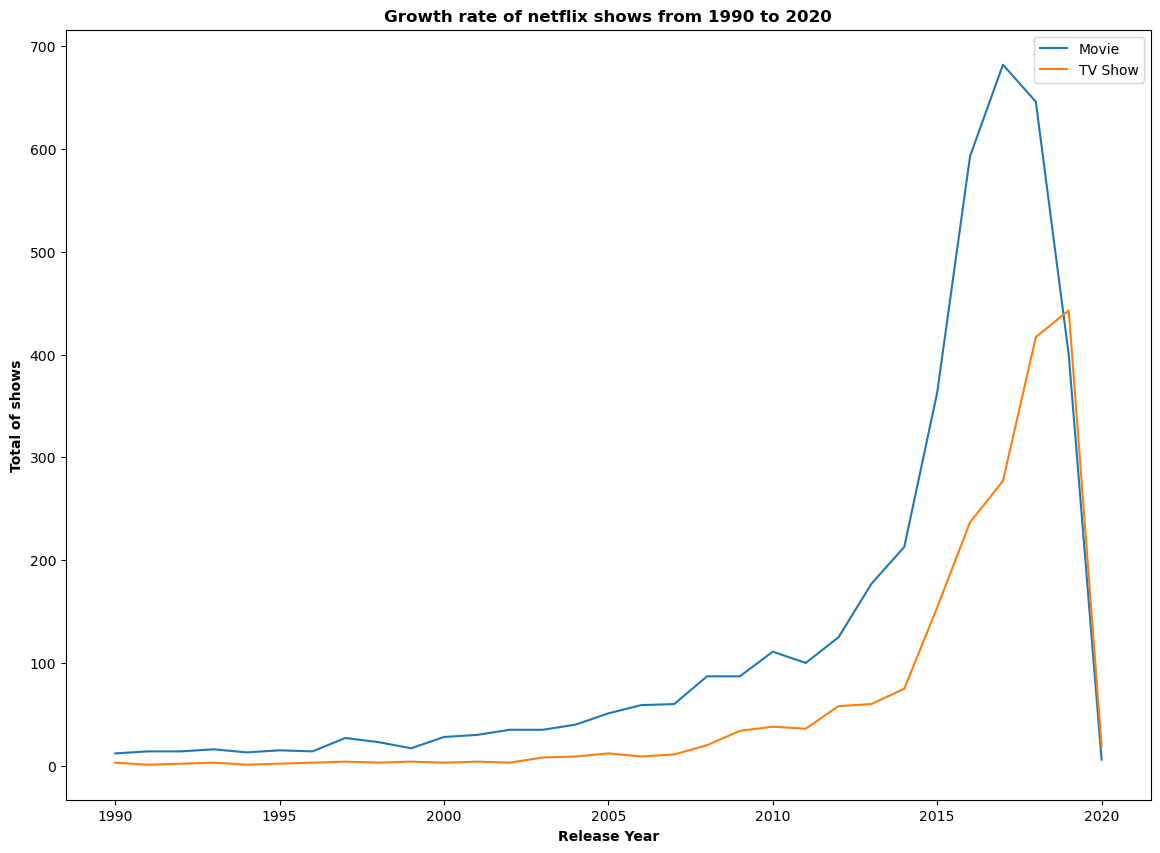

In [11]:
fig = plt.figure(figsize = (14, 10))
ax = movie_group_year.plot()
tv_group_year.plot(ax=ax)
ax.legend(["Movie", "TV Show"]);
plt.xlabel("Release Year",weight="bold")
plt.ylabel("Total of shows",weight="bold")
plt.title("Growth rate of netflix shows from 1990 to 2020",weight='bold')
plt.show()

### The slightly decreased of growth rate because of COVID-19, all pending showes were cancelled due to quarantine